# Lista 15 - Controle Digital

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sp
import control as ct
import numpy as np

import sympy

## 1)

In [ ]:
z = ct.tf('z')
s = ct.tf('s')
T = 0.15

C  = (5.175 - 4.455*z**-1)/(1 - 0.5388*z**-1)   # c[k] = 5.175*e[k]-4.55*e[k-1] - (-0.5388*c[k-1])
G  = ct.c2d(1/(s+1), T)                         # ZOH*G
GH = ct.c2d((1/(s+1) * (1/s)), T)               # ZOH*G*H
####
print(G)
print(GH)


  0.1393
----------
z - 0.8607

dt = 0.15


 0.01071 z + 0.01019
----------------------
z^2 - 1.861 z + 0.8607

dt = 0.15



Com as transformadas em mãos, temos que a equação recursiva do bloco G é $c[k] = 0.1393\cdot u[k-1] - (-0.8607\cdot c[k-1])$

Do bloco GH: $v[k] = 0.0107\cdot u[k] + 0.0102\cdot u[k-1] - (-1.861\cdot v[k-1] + 0.8607\cdot v[k-2])$

## 2)

$T=0.2\space s$

$u(k+1)- 0,8187\cdot u(k)= 0,1813\cdot e(k)$

$u(k) = 0,1813\cdot e(k-1) + 0,8187\cdot u(k-1)$

$CD(z) = \dfrac{U(z)}{E(z)} = \dfrac{0,1813\cdot z^{-1}}{1-0,8187\cdot z^{-1}}$

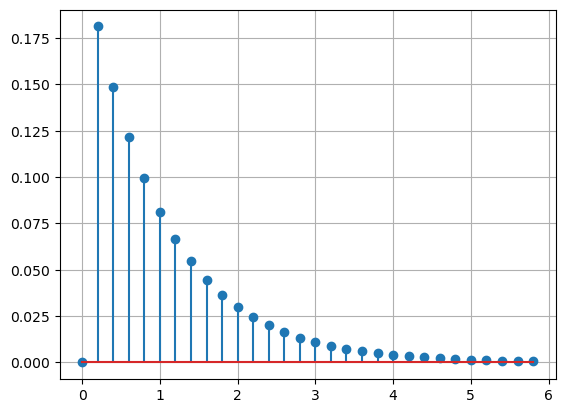

In [ ]:
T  = 0.2
z  = ct.tf('z')
C = (0.1813*z**-1)/(1-0.8187*z**-1)
t, yout = ct.impulse_response(C, np.arange(0, 6, T))
plt.stem(t, yout)
plt.grid(True)
plt.show()

$\dfrac{G(s)}{s} = \dfrac{1}{s(s+5)}$

$G(z) = \dfrac{1}{5}\cdot\dfrac{(1-e^{-5\cdot T})\cdot z^{-1}}{1-e^{-5\cdot T}\cdot z^{-1}}$

$G(z) \approx \dfrac{0.1264\cdot z^{-1}}{1-0.3679\cdot z^{-1}}$

$c(k) = 0.1264\cdot u[k] - (c[k] - 0.3679\cdot c[k-1])$


   0.1264 z
--------------
z^2 - 0.3679 z



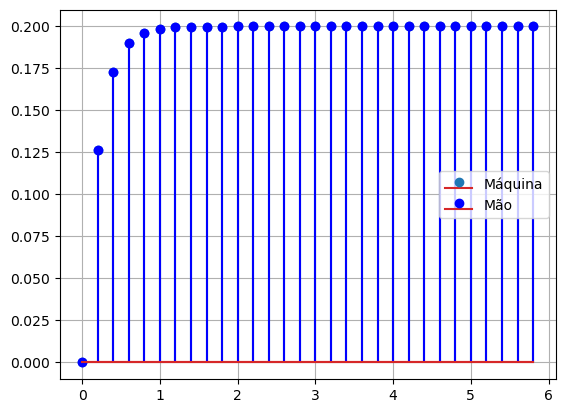

2.8680761469483214e-17


In [129]:
s  = ct.tf('s')
G  = 1/(s+5)
Gm = ct.c2d(G, T)
Gz = (1/5)*(1-np.exp(-5*T))*z**-1/(1-np.exp(-5*T)*z**-1)
print(Gz)
tz, youtz = ct.step_response(Gz, np.arange(0, 6, T))
t, yout = ct.step_response(Gm, np.arange(0, 6, T))
plt.stem(t, yout)
plt.stem(tz, youtz, 'b')
plt.legend(["Máquina", "Mão"])
plt.grid(True)
plt.show()
print(np.average((yout) - (youtz)))

## FTMF do Sistema

$C(z) = \dfrac{U(z)}{E(z)} = \dfrac{0,1813\cdot z^{-1}}{1-0,8187\cdot z^{-1}}$

$G(z) \approx \dfrac{0.1264\cdot z^{-1}}{1-0.3679\cdot z^{-1}}$

$C(z)\cdot G(z) = \dfrac{0.0229\cdot z^{-2}}{(1-0,8187\cdot z^{-1})(1-0,3679\cdot z^{-1})}
= \dfrac{0.0229\cdot z^{-2}}{1-1.1866z^{-1}+0.3012z^{-2}}$

$FTMF = \dfrac{C(z)\cdot G(z)}{1+C(z)\cdot G(z)} \approx \dfrac{0.0229\cdot z^{-2}}{1-1.1866z^{-1}+0.3012z^{-2}+0.0229\cdot z^{-2}}$

$FTMF \approx \dfrac{0.0229\cdot z^{-2}}{1-1.1866z^{-1}+0.3241\cdot z^{-2}}$

In [ ]:
ct.feedback(ct.minreal(Gz*C), 1)

2 states have been removed from the model


TransferFunction(array([0.02292069]), array([ 1.        , -1.18657944,  0.32410359]), True)

In [64]:
FTMF  = ct.minreal((0.02292*z**-2)/(1-1.187*z**-1 + 0.3241*z**-2))
FTMF

3 states have been removed from the model


TransferFunction(array([0.02292]), array([ 1.    , -1.187 ,  0.3241]), True)

### Resposta ao Degrau Por Transformada Reversa

$Y(z) = \dfrac{1}{1-z^{-1}}\cdot\dfrac{0.0229\cdot z^{-1}}{1-1.1866z^{-1}+0.3241\cdot z^{-2}}$

$Y(z) = \dfrac{0.0229\cdot z^{-1}}{1-1.1866z^{-1}+0.3241\cdot z^{-2} - (z^{-1}-1.1866z^{-2}+0.3241\cdot z^{-3})}$

$Y(z) = \dfrac{0.0229\cdot z^{-1}}{1-2.1866z^{-1}+1.5107\cdot z^{-2}-0.3241z^{-3}}$

$Y(z) = \dfrac{0.02171z^{-1}}{1-0.4263z^{-1}} - \dfrac{0.1654z^{-1}}{1−0.7603z^{-1}} + \dfrac{0.1665z^{-1}}{1-z^{-1}} $

$y(k(T-1)) = (0.1665 - 0.1654e^{-0.7603k(T-1)} + 0.02171e^{-0.4263k(T-1)})u(k(T-1))$

In [35]:
import sympy

z = sympy.Symbol('z')
Y = 0.0229*z**2/(z**3 - 2.1866*z**2 + 1.5107*z - 0.3241)
sympy.apart(Y, full=True).doit()

0.0217059206555055/(z - 0.426252431924317) - 0.165351375200963/(z - 0.760347568075682) + 0.166545454545457/(z - 1.0)

In [85]:
z = ct.tf('z')
ct.minreal((0.0217059206555055/(z-0.426252431924317))
            - (0.165351375200963/(z-0.760347568075682))
            + (0.166545454545457/(z-1)))

0 states have been removed from the model


TransferFunction(array([ 2.29000000e-02,  1.74860126e-15, -8.04911693e-16]), array([ 1.    , -2.1866,  1.5107, -0.3241]), True)

In [88]:
ct.minreal(FTMF/(1-z**-1)) # Resposta ao Degrau

0 states have been removed from the model


TransferFunction(array([0.02292, 0.     ]), array([ 1.    , -2.187 ,  1.5111, -0.3241]), True)

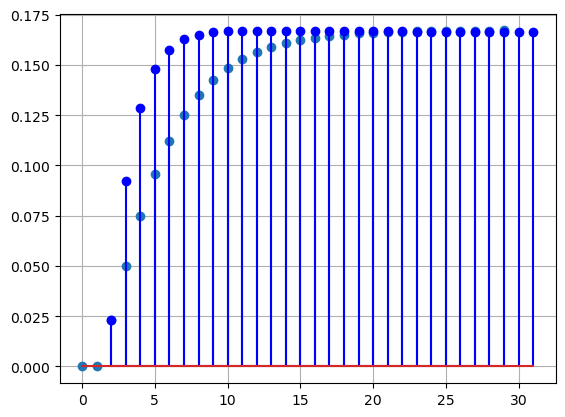

In [127]:
t, yout = ct.step_response(FTMF, np.arange(0, 6, T))
plt.stem(yout)
# y(k(T-1)) = (0.1665 - 0.1654e^{-0.7603T(k-1)} + 0.02171e^{-0.4263T(k-1)})u(T(k-1))
k = np.arange(0, len(t)) # Ajusta offset em k
plt.stem(k+2, 0.166545454545457 - 0.165351375200963*np.exp(-0.760347568075682*k*(1-T))
         + 0.0217059206555055*np.exp(-0.426252431924317*k*(1-T)), 'b')
plt.grid(True)
plt.show()

In [ ]:
z   = ct.tf('z')
T   = 0.25
a   = 4
Gz  = (8/a)*(1-np.exp(-a*T))*z**-1
Gz  = Gz/(1-np.exp(-a*T)*z**-1)
# Gz  = (8/a)*(1-np.exp(-a*T))/(1-np.exp(-a*T)*z**-1)
Gz

TransferFunction(array([1.26424112, 0.        ]), array([ 1.        , -0.36787944,  0.        ]), True)

In [ ]:
ct.c2d(8/(s+4), T)

TransferFunction(array([1.26424112]), array([ 1.        , -0.36787944]), 0.25)

## 3)

In [21]:
j     = complex(0, 1)
zeta  = 0.4
w     = 2
wd    = w*np.sqrt(1-zeta**2)
# T = 2PI/ws
# ws/wd = 10
# ws = 10wd
# T = 2PI/(10wd)
T  = 2*np.pi/(10*wd)
GH = ct.minreal(ct.c2d(1/(s+1) * 1, T)) # ZOH*G*H
GH

0 states have been removed from the model


TransferFunction(array([0.29020271]), array([ 1.        , -0.70979729]), 0.3427758604236288)

### Remove Polos da Planta

In [186]:
z1 = np.exp((-zeta*w + j*wd) * T) # z1 = e^{s1T}
p  = ct.poles(GH)
# Adiciona polo integrador
C  = 1/(z-1)
# Remove polos da planta
for polo in p:
    C = C*(z-polo)
C

TransferFunction(array([ 1.        +0.j, -0.70979729+0.j]), array([ 1, -1]), True)

### Adiciona Polo no Controlador Para Criar o Ângulo Desejado

In [187]:
fi = 0
for polo in ct.poles(C*GH):
    fi = fi - np.arctan2(z1.imag - polo.imag, z1.real - polo.real)

fi = fi-np.pi # Contribuição angular do polo "beta"
# fi = -np.arctan2(z1.imag - beta.imag, z1.real - beta.real)
# fi = -np.arctan2(z1.imag, z1.real - beta)
# np.tan(-fi) = z1.imag/(z1.real - beta)
# z1.real - beta = z1.imag/np.tan(-fi)
beta = np.real(z1.real - z1.imag/np.tan(-fi))
# beta = (z1.imag - z1.real * np.tan(-fi))/np.tan(fi)
C = ct.minreal(C/(z-beta))
C

0 states have been removed from the model


TransferFunction(array([ 1.        +0.j, -0.70979729+0.j]), array([ 1.        , -1.27499059,  0.27499059]), True)

In [198]:
[[[b]], [[a]]] = ct.tfdata(C*GH)
pole = np.polyval(a, z1)/np.polyval(b, z1)
print("<z1  =", np.angle(pole)*180/np.pi)

<z1  = -176.51760699883954


### Ajustando Ganho

In [189]:
# |K*GH| = 1
#
#      |  1 |
#|K| = |----|
#      | GH |
[[[b]], [[a]]] = ct.tfdata(C*GH)
K = np.abs(np.polyval(a, z1)/np.polyval(b, z1))
K

1.1411218105939602

In [190]:
pole = np.polyval(a, z1)/np.polyval(K*b, z1)
print(" z1  =", pole)
print("|z1| =", np.abs(pole))
print("<z1  =", np.angle(pole)*180/np.pi)

 z1  = (-0.9981535115153385-0.06074180973266398j)
|z1| = 1.0
<z1  = -176.51760699883954


In [204]:
100*(np.angle(pole)+np.pi)/np.pi # Erro de ângulo

1.9346627784224741

In [192]:
C = K*C
C

TransferFunction(array([ 1.14112181+0.j, -0.80996517+0.j]), array([ 1.        , -1.27499059,  0.27499059]), True)

## Equação Recursiva do Microcontrolador

$u[k] = 1.574\cdot e[k] - 1.117\cdot e[k-1] - (-1.275\cdot u[k-2] + 0.275\cdot u[k-2])$

1 states have been removed from the model


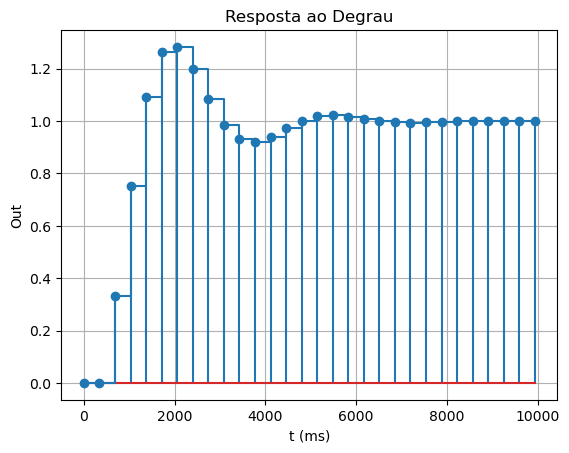

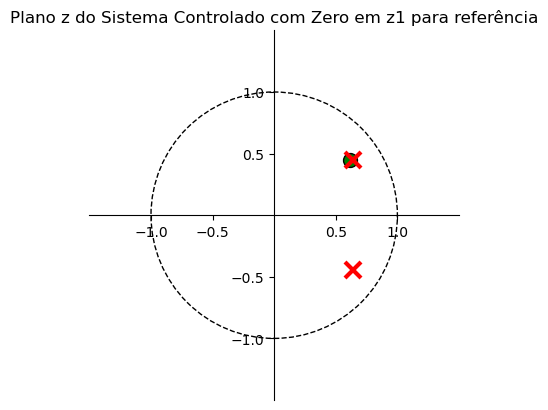

In [193]:
import controle as ctl
FTMF = ct.minreal(ct.feedback(C*GH, 1))
_, t, y = ctl.plot_step(FTMF, np.arange(0, 10, T))
plt.show()
ctl.zplane((z-z1)*FTMF, title="Plano z do Sistema Controlado com Zero em z1 para referência")
plt.show()

In [194]:
Ta = 4/(zeta*w)
print("Ta:", Ta)
Mp = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
print(Mp)

Ta: 5.0
0.2538267219801087


In [195]:
np.max(y)

1.2833441709594762